In [1]:
#pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('adult.csv')
print(df.head())


   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [4]:
print(df.shape)
#rint(df.info)

(32561, 15)


In [5]:
#print(dataset.isnull().sum())
print(df.isna().sum())


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [6]:
# Replace ? to na
df.replace('?', np.nan, inplace=True)
print(df.isna().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


Handling Missing Values

In [7]:
# drop the rows with missing values
df_drop = df.dropna()

In [8]:
print(df_drop.shape)

(30162, 15)


In [9]:
#print(df_drop.head)

In [10]:
# Original row count
n_original = len(df)

# cleaned after Drop rows with any missing values
n_clean = len(df_drop)

# Calculate retention
retained_pct = n_clean / n_original * 100
print(f"Rows before cleaning: {n_original}")
print(f"Rows after dropping missing: {n_clean}")
print(f"Data retained: {retained_pct:.2f}%")


Rows before cleaning: 32561
Rows after dropping missing: 30162
Data retained: 92.63%


In [11]:
loss_pct = (n_original - n_clean) / n_original * 100 
if  loss_pct > 5 :
    print(f"Data Loss is {loss_pct:.2f}%. Since > 5%, dropping the rows is NOT recommended, instead use Imputer") 


Data Loss is 7.37%. Since > 5%, dropping the rows is NOT recommended, instead use Imputer


Use Simple Imputer to assign the Missing Values

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
print(df.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


In [14]:
# As identiifed all the ? columns are categorical columns, we can replace them with the mode of the column

missed_categorical_columns = ['workclass', 'occupation', 'native.country']
categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical_imputer.fit(df[missed_categorical_columns])
org_df = df.copy() #for count purpose
df[missed_categorical_columns] = categorical_imputer.transform(df[missed_categorical_columns])
print(df.isna().sum())


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [15]:
# Original row count
n_original = len(org_df)

# cleaned after imputing values to missed categorical columns
n_clean = len(df)

# Calculate retention
retained_pct = n_clean / n_original * 100
print(f"Rows before cleaning: {n_original}")
print(f"Rows after dropping missing: {n_clean}")
print(f"Data retained: {retained_pct:.2f}%")

Rows before cleaning: 32561
Rows after dropping missing: 32561
Data retained: 100.00%


In [16]:
# Clean any whitespace or case issues in categorical columns ######### Seems to be not required for this dataset
cat_cols = ['workclass','education','marital.status','occupation',
            'relationship','race','sex','native.country']
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90   private   77053       hs-grad              9        widowed   
1   82   private  132870       hs-grad              9        widowed   
2   66   private  186061  some-college             10        widowed   
3   54   private  140359       7th-8th              4       divorced   
4   41   private  264663  some-college             10      separated   

          occupation   relationship   race     sex  capital.gain  \
0     prof-specialty  not-in-family  white  female             0   
1    exec-managerial  not-in-family  white  female             0   
2     prof-specialty      unmarried  black  female             0   
3  machine-op-inspct      unmarried  white  female             0   
4     prof-specialty      own-child  white  female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  united-states  <=50K  
1          4356              18  united-states

Feature Encoding

In [17]:
# Encode target to binary numeric
df['income_bin'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Define columns
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation',
                    'relationship', 'race', 'sex', 'native.country']
numeric_cols = ['age', 'education.num', 'hours.per.week', 'capital.gain', 'capital.loss']

# 2. Impute missing categorical values with mode
# Already covered in previous step

# 3. One-hot encode categorical variables
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_arr = ohe.fit_transform(df[categorical_cols])

# Get new column names and create DataFrame
ohe_cols = ohe.get_feature_names_out(categorical_cols)
df_ohe = pd.DataFrame(ohe_arr, columns=ohe_cols, index=df.index)

# 4. Scale numeric features
scaler = StandardScaler()
scaled_arr = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(scaled_arr, columns=numeric_cols, index=df.index)


# 5. Combine everything into one DataFrame
df_prepared = pd.concat([df_ohe, df_scaled], axis=1)

# 6. Check shape to confirm columns combined
print("Encoded shape:", df_ohe.shape)
print("Scaled shape:", df_scaled.shape)
print("Final prepared data shape:", df_prepared.shape)


Encoded shape: (32561, 99)
Scaled shape: (32561, 5)
Final prepared data shape: (32561, 104)


In [19]:
print(df_scaled)

            age  education.num  hours.per.week  capital.gain  capital.loss
0      3.769612      -0.420060       -0.035429      -0.14592     10.593507
1      3.183112      -0.420060       -1.817204      -0.14592     10.593507
2      2.010110      -0.031360       -0.035429      -0.14592     10.593507
3      1.130359      -2.363558       -0.035429      -0.14592      9.461864
4      0.177296      -0.031360       -0.035429      -0.14592      9.461864
...         ...            ...             ...           ...           ...
32556 -1.215643      -0.031360       -0.035429      -0.14592     -0.216660
32557 -0.849080       0.746039       -0.197409      -0.14592     -0.216660
32558  0.103983      -0.420060       -0.035429      -0.14592     -0.216660
32559  1.423610      -0.420060       -0.035429      -0.14592     -0.216660
32560 -1.215643      -0.420060       -1.655225      -0.14592     -0.216660

[32561 rows x 5 columns]


In [20]:
print(df_prepared)

       workclass_federal-gov  workclass_local-gov  workclass_never-worked  \
0                        0.0                  0.0                     0.0   
1                        0.0                  0.0                     0.0   
2                        0.0                  0.0                     0.0   
3                        0.0                  0.0                     0.0   
4                        0.0                  0.0                     0.0   
...                      ...                  ...                     ...   
32556                    0.0                  0.0                     0.0   
32557                    0.0                  0.0                     0.0   
32558                    0.0                  0.0                     0.0   
32559                    0.0                  0.0                     0.0   
32560                    0.0                  0.0                     0.0   

       workclass_private  workclass_self-emp-inc  workclass_self-emp-not-in

EDA (Exploratory Data Analysis) : Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

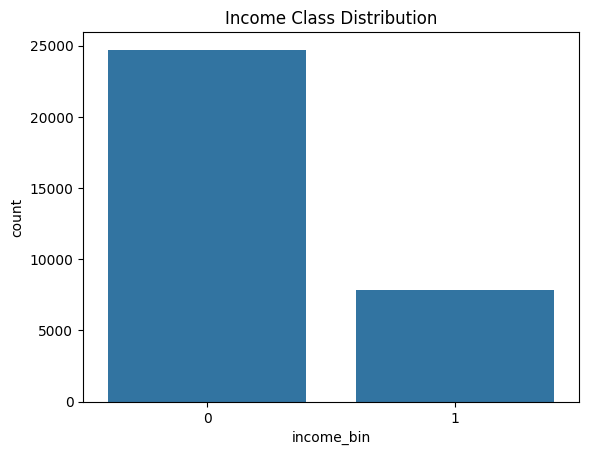

In [22]:
#Income distribution 
# <=50K': 0, '>50K': 1
sns.countplot(x='income_bin', data=df)
plt.title('Income Class Distribution')
plt.show()

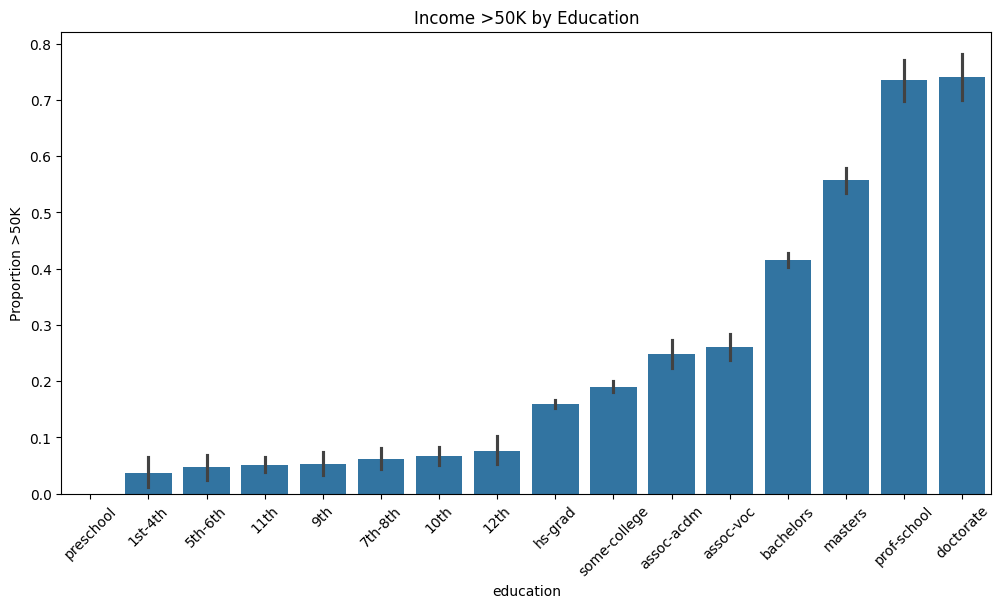

In [23]:
#Income by education level
plt.figure(figsize=(12,6))
sns.barplot(x='education', y='income_bin', data=df, order=df.groupby('education')['income_bin'].mean().sort_values().index)
plt.xticks(rotation=45)
plt.ylabel('Proportion >50K')
plt.title('Income >50K by Education')

plt.show()

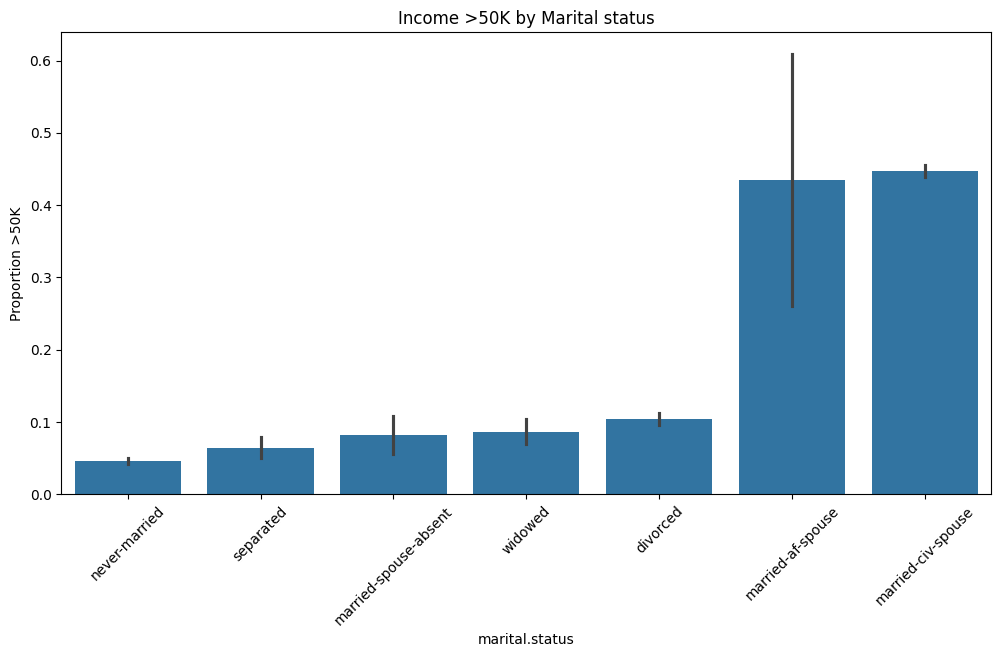

In [24]:
#Income by marital status
plt.figure(figsize=(12,6))
sns.barplot(x='marital.status', y='income_bin', data=df, order=df.groupby('marital.status')['income_bin'].mean().sort_values().index)
plt.xticks(rotation=45)
plt.ylabel('Proportion >50K')
plt.title('Income >50K by Marital status')

plt.show()

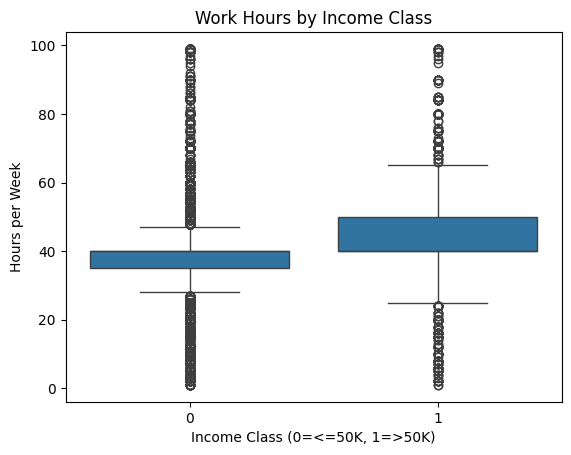

In [25]:
#Income by hours worked
sns.boxplot(x='income_bin', y='hours.per.week', data=df)
plt.xlabel('Income Class (0=<=50K, 1=>50K)')
plt.ylabel('Hours per Week')
plt.title('Work Hours by Income Class')
plt.show()

Text(0.5, 1.0, 'Income >50K by Sex')

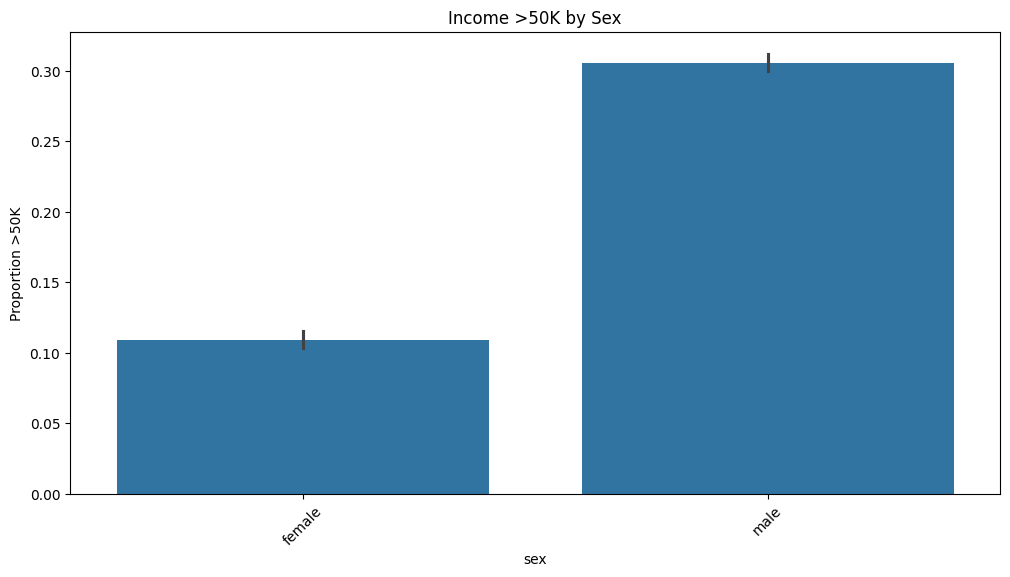

In [26]:
# Income Proportion by Sex 
plt.figure(figsize=(12,6))
sns.barplot(x='sex', y='income_bin', data=df, order=df.groupby('sex')['income_bin'].mean().sort_values().index)
plt.xticks(rotation=45)
plt.ylabel('Proportion >50K')
plt.title('Income >50K by Sex')

Text(0.5, 1.0, 'Income >50K by Race')

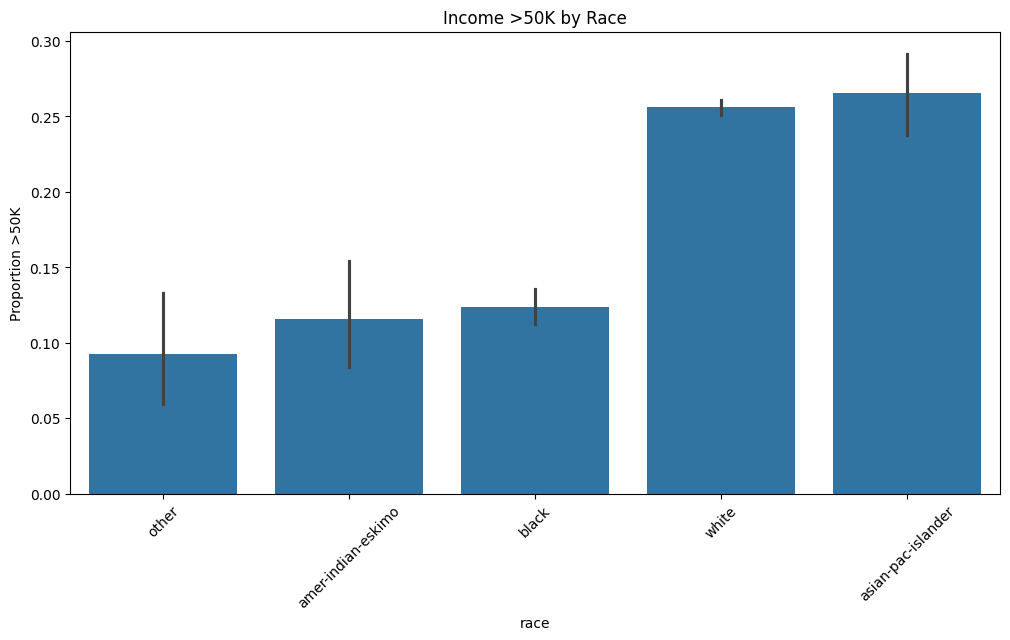

In [27]:
# Income Proportion by race 
plt.figure(figsize=(12,6))
sns.barplot(x='race', y='income_bin', data=df, order=df.groupby('race')['income_bin'].mean().sort_values().index)
plt.xticks(rotation=45)
plt.ylabel('Proportion >50K')
plt.title('Income >50K by Race')

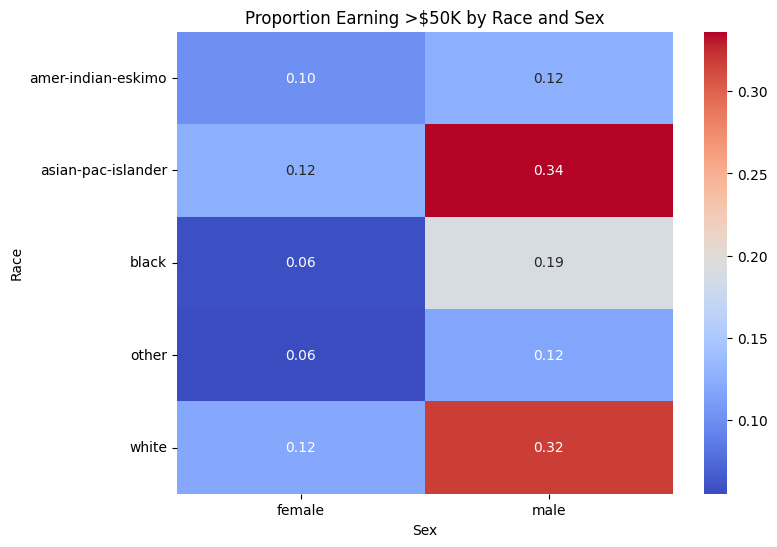

In [28]:
# Income Proportion group by race and sex
pivot = df.groupby(['race', 'sex'])['income_bin'].mean().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Proportion Earning >$50K by Race and Sex')
plt.ylabel('Race')
plt.xlabel('Sex')
plt.show()

Text(0.5, 1.0, 'Income >50K by native.country')

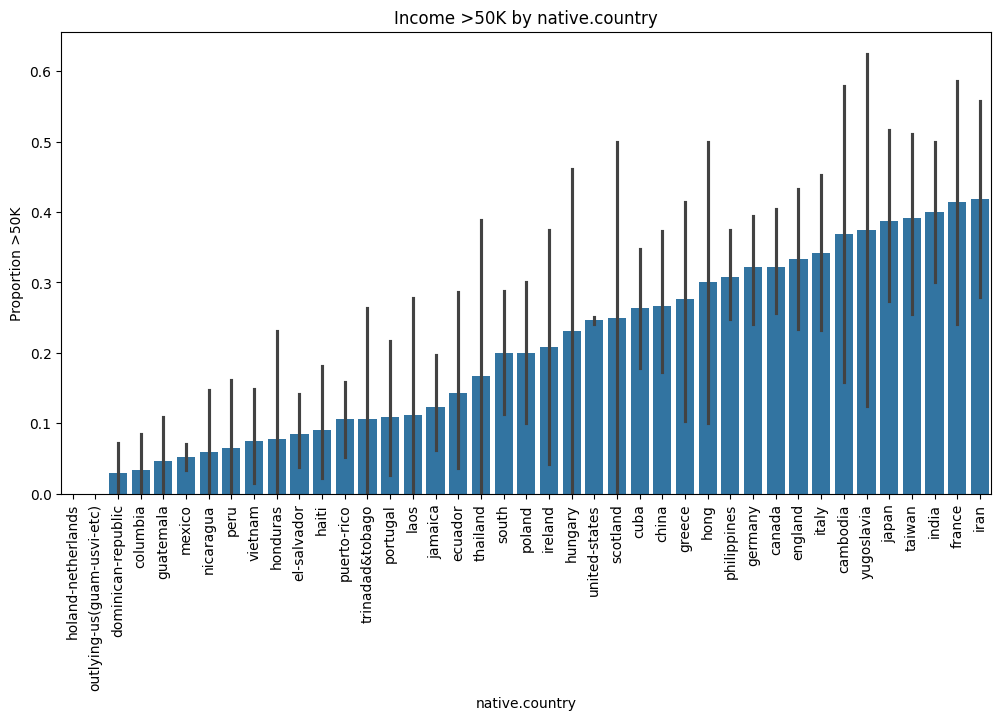

In [29]:
# Income Proportion by Native country
plt.figure(figsize=(12,6))
sns.barplot(x='native.country', y='income_bin', data=df, order=df.groupby('native.country')['income_bin'].mean().sort_values().index)
plt.xticks(rotation=90)
plt.ylabel('Proportion >50K')
plt.title('Income >50K by native.country')

In [30]:
country_props = (
    df.groupby('native.country')['income_bin']
      .mean()
      .sort_values(ascending=False)
)

print(country_props.head(10))  # top 10 countries
print(country_props.tail(10))  # bottom 10

native.country
iran          0.418605
france        0.413793
india         0.400000
taiwan        0.392157
japan         0.387097
yugoslavia    0.375000
cambodia      0.368421
italy         0.342466
england       0.333333
canada        0.322314
Name: income_bin, dtype: float64
native.country
honduras                      0.076923
vietnam                       0.074627
peru                          0.064516
nicaragua                     0.058824
mexico                        0.051322
guatemala                     0.046875
columbia                      0.033898
dominican-republic            0.028571
holand-netherlands            0.000000
outlying-us(guam-usvi-etc)    0.000000
Name: income_bin, dtype: float64


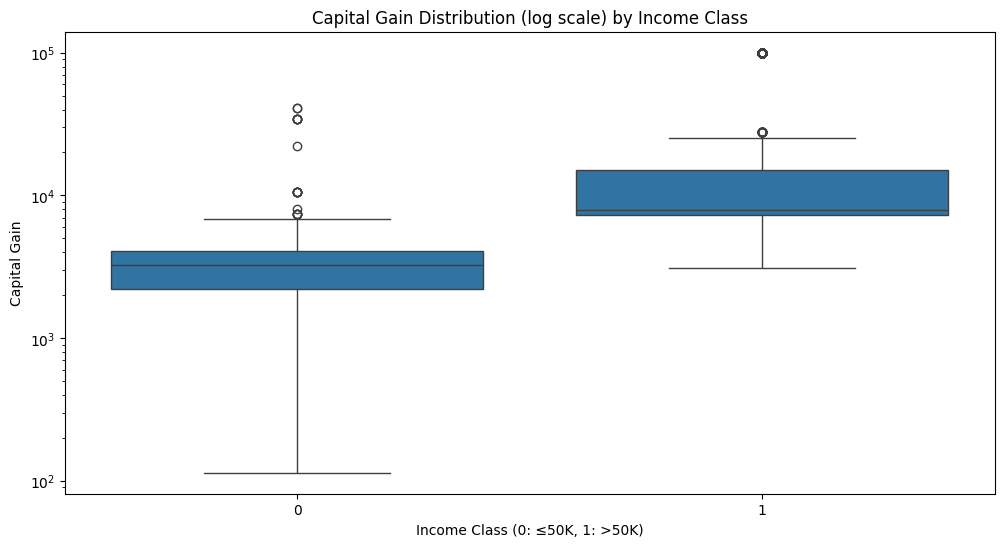

In [31]:
# Capital Gain
df_gain = df[df['capital.gain'] > 0]

plt.figure(figsize=(12,6))
sns.boxplot(x='income_bin', y='capital.gain', data=df_gain)
plt.yscale('log')  # Log scale handles skewed distribution
plt.xlabel('Income Class (0: ≤50K, 1: >50K)')
plt.ylabel('Capital Gain')
plt.title('Capital Gain Distribution (log scale) by Income Class')
plt.show()

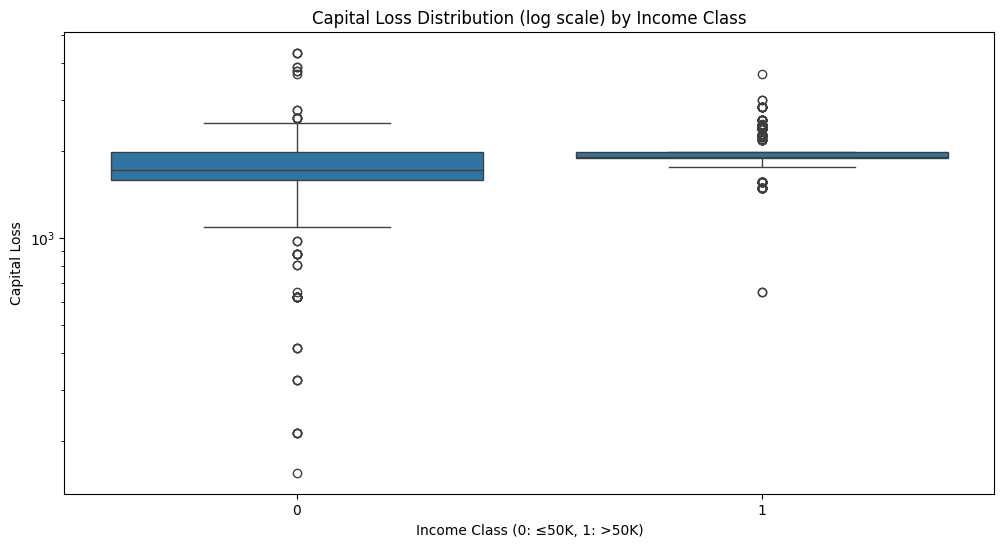

In [32]:
# Capital Loss
df_loss = df[df['capital.loss'] > 0]

plt.figure(figsize=(12,6))
sns.boxplot(x='income_bin', y='capital.loss', data=df_loss)
plt.yscale('log')  # Log scale handles skewed distribution
plt.xlabel('Income Class (0: ≤50K, 1: >50K)')
plt.ylabel('Capital Loss')
plt.title('Capital Loss Distribution (log scale) by Income Class')
plt.show()

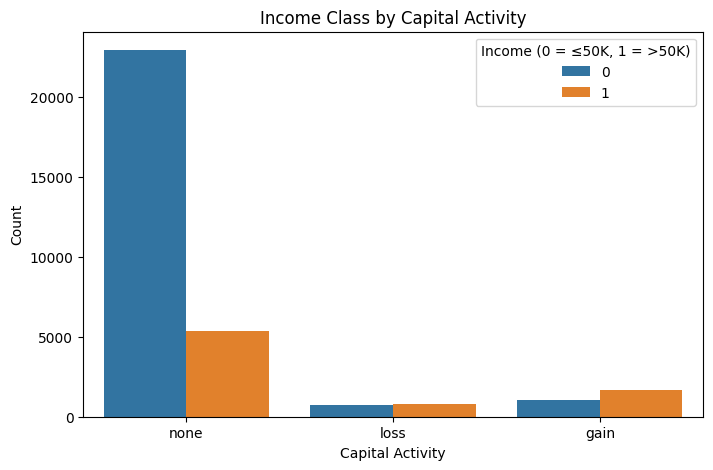

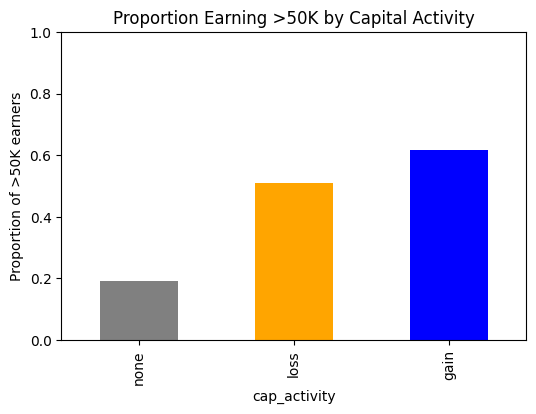

In [33]:
# Combined Visualize of Capital Gain and Loss
# 1. Create a new categorical feature for capital activity
df['cap_activity'] = df.apply(
    lambda row: (
        'gain' if row['capital.gain'] > 0 else
        'loss' if row['capital.loss'] > 0 else
        'none'
    ),
    axis=1
)

# 2. Plot the proportion of income classes within each cap_activity category
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='cap_activity', hue='income_bin',
              order=['none', 'loss', 'gain'])
plt.title('Income Class by Capital Activity')
plt.xlabel('Capital Activity')
plt.ylabel('Count')
plt.legend(title='Income (0 = ≤50K, 1 = >50K)')
plt.show()

# 4. Show proportions instead of counts
prop = df.groupby('cap_activity')['income_bin'].mean().loc[['none','loss','gain']]
prop.plot(kind='bar', figsize=(6,4), color=['gray','orange','blue'])
plt.ylabel('Proportion of >50K earners')
plt.ylim(0,1)
plt.title('Proportion Earning >50K by Capital Activity')
plt.show()

Quantifying Correlation

In [34]:
corr = df[['education.num', 'hours.per.week', 'capital.gain', 'capital.loss', 'age', 'income_bin']].corr()
print(corr['income_bin'].sort_values(ascending=False))


income_bin        1.000000
education.num     0.335154
age               0.234037
hours.per.week    0.229689
capital.gain      0.223329
capital.loss      0.150526
Name: income_bin, dtype: float64


🔑 Question 1: What features show the strongest correlation with earning >$50K?

✅ Answer 1: Education, Age and Hours per week

🔑 Question 2: How does income vary with education, marital status, or hours worked per week?

✅ Answer 2: Higher education, being Married and working more hours positively correlate with higher earnings (>50k)

🔑 Question 3: Are there disparities across race, sex, or native country?

✅ Answer 3: Sex ==> Men earns higher than Women
        Race ==> Whites and Asians are earnong high than other races
        Native ==> Iran, France and India are leading in earnings.
                   outlying-us, holand-netherlands, dominican-republic are least in order.

🔑 Question 4: Do capital gains/losses strongly impact the income label?

✅ Answer 4: None => lowest proportion of >50K earners.
        Loss => medium proportion—higher than “none” but lower than “gain”.
        Gain => highest proportion—confirms strong association of capital gains with higher income.

Week 1: Laying the Foundation

🔑 Question 1:
Which features in the dataset appear to have the strongest relationship with the income label (>50K), and how did you determine this?
🎯 Purpose: Tests ability to identify influential predictors through EDA.

💡 Hint:
Use .groupby('income') to compare mean values of numeric features.
Use bar plots or violin plots for categorical features vs. income.
Check chi-squared test or information gain if desired.

✅ Answer 1: As per the below workouts, Capital Gain has very strong relationship with the income in numerical features. 
In Categorical: Education, Marital status show significant difference by income.

In [35]:
# 1. Find the mean differnce for numeric features
#numeric_cols = ['age', 'education.num', 'hours.per.week', 'capital.gain', 'capital.loss']
#df.groupby('income')[numeric_cols].mean()
mean_values = df.groupby('income')[numeric_cols].mean()
mean_diff = mean_values.loc['>50K'] - mean_values.loc['<=50K']
mean_diff = mean_diff.sort_values(ascending=False)
summary = mean_values.T
summary['mean_diff'] = mean_diff
print("\nSummary table:\n", summary)
#  Capital Gain has the largest mean difference, suggesting a very strong relationship.


Summary table:
 income               <=50K         >50K    mean_diff
age              36.783738    44.249841     7.466103
education.num     9.595065    11.611657     2.016592
hours.per.week   38.840210    45.473026     6.632816
capital.gain    148.752468  4006.142456  3857.389989
capital.loss     53.142921   195.001530   141.858610


In [36]:
#2. plot categorical feature vs income proportion
def plot_cat_vs_income(feature, title=None, figsize=(10,5)):
    """Plot the proportion of >50K earners for each category in 'feature'."""
    plt.figure(figsize=figsize)
    order_vals = df.groupby(feature)['income_bin'].mean().sort_values().index
    sns.barplot(x=feature, y='income_bin', data=df, order=order_vals)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Proportion earning >50K')
    plt.xlabel(feature)
    if title:
        plt.title(title)
    plt.tight_layout()
    plt.show()

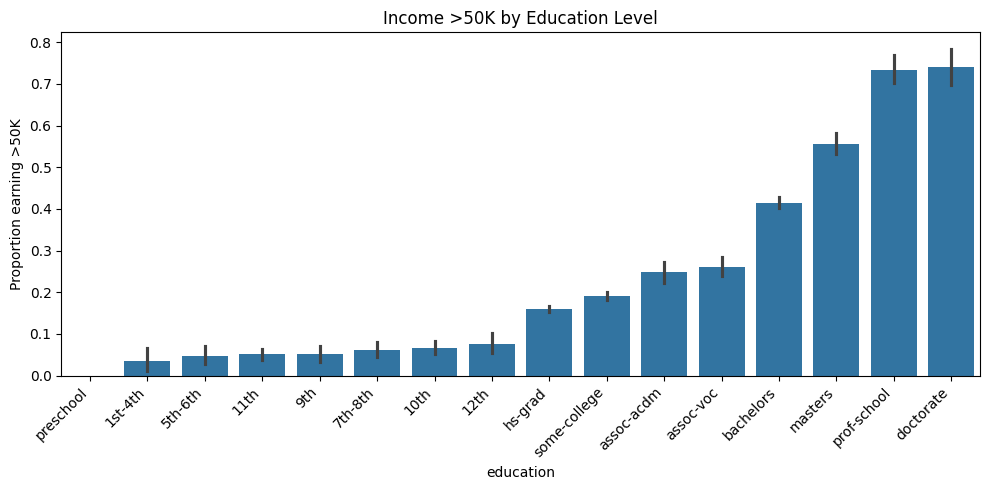

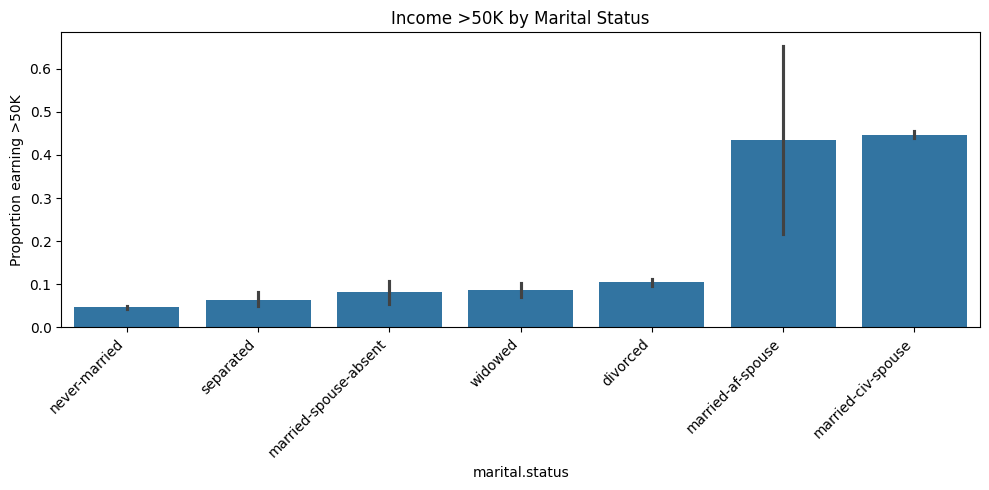

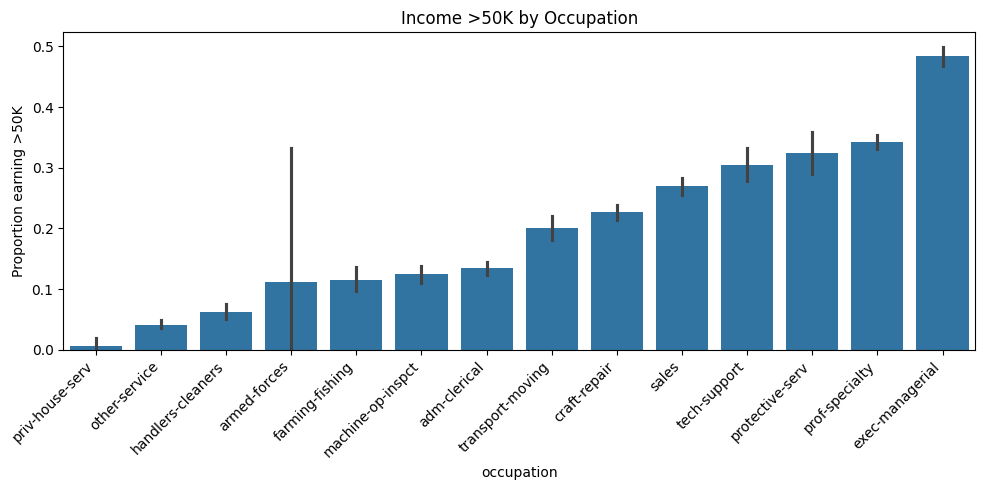

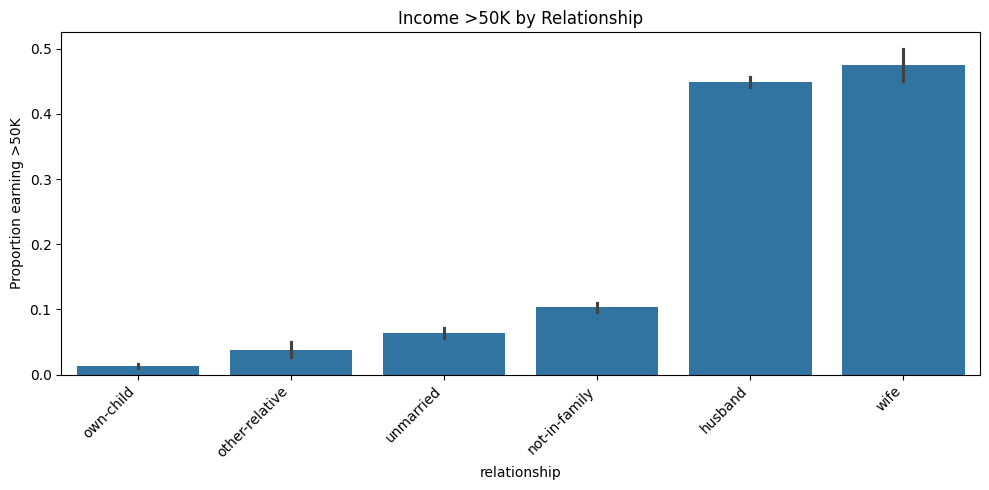

In [37]:
plot_cat_vs_income('education', title='Income >50K by Education Level')
plot_cat_vs_income('marital.status', title='Income >50K by Marital Status')
plot_cat_vs_income('occupation', title='Income >50K by Occupation')
plot_cat_vs_income('relationship', title='Income >50K by Relationship')

🔑 Question 2:
Did you engineer any new features from existing ones? If so, explain the new feature(s) and why you think they might help your classifier.

✅ Answer 2: Yes — I created "cap_activity" a derived feature combining both capital gain and loss into a single feature with values,

'none' if both are zero, 
'gain' if capital-gain > 0,
'loss' if capital-loss > 0

I added this for a Combined Visualize of Capital Gain and Loss

🔑 Question 3:
Which continuous features required scaling or transformation before modeling, and which method did you use?

✅ Answer 3: I used StandardScaler ( mean diff and standard deviation) to transform the numeric features so to put them on similar scales.
        #numeric_cols = ['age', 'education.num', 'hours.per.week', 'capital.gain', 'capital.loss']

🔑 Question 4:
Is the target variable (income) imbalanced? How did you check, and what will you do (if anything) to handle it?

✅ Answer 4: Yes, imbalanced ( <=50K is 75.919044 and >50K is 24.080956 )
Will take care in the Model phase using split with "Startify = y" in train_test_split()

In [38]:
df['income'].value_counts(normalize=True) * 100

income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64

🔑 Question 5:
What does your final cleaned dataset look like before modeling? Include shape, types of features (numerical/categorical), and a summary of the preprocessing steps applied.

✅ Answer 5: Replaced all ? and handled missing values. 
df.shape ==> (32561, 17)
All numeric columns are scaled and ready for modelling : age, education-num, hours-per-week, capital-gain, capital-loss
All Categorical features are imputed and encoded : workclass, education, marital-status, occupation, relationship, race, sex, native-country
Added new target feature income_bin (0 = ≤50K, 1 = >50K)
Added new derived feature cap_activity  categorized as 'none', 'loss', 'gain'

In [39]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
income_bin         int64
cap_activity      object
dtype: object


In [40]:
print(df.head)

<bound method NDFrame.head of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90   private   77053       hs-grad              9             widowed   
1       82   private  132870       hs-grad              9             widowed   
2       66   private  186061  some-college             10             widowed   
3       54   private  140359       7th-8th              4            divorced   
4       41   private  264663  some-college             10           separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   private  310152  some-college             10       never-married   
32557   27   private  257302    assoc-acdm             12  married-civ-spouse   
32558   40   private  154374       hs-grad              9  married-civ-spouse   
32559   58   private  151910       hs-grad              9             widowed   
32560   22   private  201490       hs-grad              9       never-married  

In [41]:
print(df.shape)

(32561, 17)


In [42]:
print(df.dtypes.value_counts())

object    10
int64      7
Name: count, dtype: int64


In [43]:
print(df.describe)

<bound method NDFrame.describe of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90   private   77053       hs-grad              9             widowed   
1       82   private  132870       hs-grad              9             widowed   
2       66   private  186061  some-college             10             widowed   
3       54   private  140359       7th-8th              4            divorced   
4       41   private  264663  some-college             10           separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   private  310152  some-college             10       never-married   
32557   27   private  257302    assoc-acdm             12  married-civ-spouse   
32558   40   private  154374       hs-grad              9  married-civ-spouse   
32559   58   private  151910       hs-grad              9             widowed   
32560   22   private  201490       hs-grad              9       never-marri